# YouTube Channel Performance Analysis

### I. Business Understanding
- This dataset includes detailed information on each channel, such as the channel name, subscriber count, total number of videos, total views, country of origin, category (e.g., entertainment, music, gaming), and the date the channel was created.
- Understand the growth dynamics of YouTube channels by analyzing the growth rates of subscribers and views across different content categories.
- Identify which categories are gaining popularity over time and potential factors driving this growth.

Key Questions:
- Which categories show the highest growth rates in subscribers and views?
- Are there any significant trends or patterns over time within each category?
- What insights can be derived from the growth trends to inform content strategy?

### II. Data Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

In [2]:
# Load the CSV file
file_path = 'youtube.csv'
data = pd.read_csv(file_path)
data

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids
3,#4,SET India,138.97K,173M,164.71B,Entertainment
4,#5,✿ Kids Diana Show,1.22K,123M,103.5B,Kids
...,...,...,...,...,...,...
495,#496,Smile Family Spanish,563,20.5M,7.63B,Entertainment
496,#497,Marvel Entertainment,8.97K,20.5M,6.01B,Entertainment
497,#498,5-Minute Crafts DIY,6.1K,20.5M,5.16B,NaN
498,#499,SatoshiSea,4,20.5M,1.55M,NaN


YouTube channel data containing the following columns: RANK, NAME_OF_CHANNEL, TOTAL_NUMBER_OF_VIDEOS, SUBSCRIBERS, VIEWS, and CATEGORY.

### III. Data Preparation
1. Convert Numerical Columns to Appropriate Data Types
- The columns TOTAL_NUMBER_OF_VIDEOS, SUBSCRIBERS, and VIEWS contain numerical values represented as strings with suffixes like 'K' (thousands), 'M' (millions), and 'B' (billions).
- Replace 'K' with '000', 'M' with '000000', and 'B' with '000000000' to convert these suffixes into their full numerical form.

In [3]:
# Function to replace suffixes and convert to numeric types
def convert_to_numeric(column):
    def parse_value(value):
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9
        else:
            return float(value.replace(',', ''))
    return column.apply(parse_value)

# Apply the function to relevant columns
data['TOTAL_NUMBER_OF_VIDEOS'] = convert_to_numeric(data['TOTAL_NUMBER_OF_VIDEOS'])
data['SUBSCRIBERS'] = convert_to_numeric(data['SUBSCRIBERS'])
data['VIEWS'] = convert_to_numeric(data['VIEWS'])

In [4]:
# Display the first few rows and general info about the dataset
display(data.head())
display(data.describe())

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799.0,274000000.0,5.098000e+10,Entertainment
1,#2,T-Series,21120.0,267000000.0,2.571600e+11,Music
2,#3,Cocomelon - Nursery Rhymes,1180.0,176000000.0,1.828800e+11,Kids
3,#4,SET India,138970.0,173000000.0,1.647100e+11,Entertainment
4,#5,✿ Kids Diana Show,1220.0,123000000.0,1.035000e+11,Kids


,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS
count,500.000000,5.000000e+02,5.000000e+02
mean,13208.112000,3.493900e+07,1.877434e+10
std,43962.527813,2.331854e+07,2.056079e+10
min,1.000000,2.040000e+07,1.390000e+03
25%,548.250000,2.360000e+07,8.682500e+09
50%,1320.000000,2.840000e+07,1.446500e+10
75%,4382.500000,3.830000e+07,2.298000e+10
max,379590.000000,2.740000e+08,2.571600e+11


In [5]:
data

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799.0,274000000.0,5.098000e+10,Entertainment
1,#2,T-Series,21120.0,267000000.0,2.571600e+11,Music
2,#3,Cocomelon - Nursery Rhymes,1180.0,176000000.0,1.828800e+11,Kids
3,#4,SET India,138970.0,173000000.0,1.647100e+11,Entertainment
4,#5,✿ Kids Diana Show,1220.0,123000000.0,1.035000e+11,Kids
...,...,...,...,...,...,...
495,#496,Smile Family Spanish,563.0,20500000.0,7.630000e+09,Entertainment
496,#497,Marvel Entertainment,8970.0,20500000.0,6.010000e+09,Entertainment
497,#498,5-Minute Crafts DIY,6100.0,20500000.0,5.160000e+09,NaN
498,#499,SatoshiSea,4.0,20500000.0,1.550000e+06,NaN


2. Handle Missing Values

In [6]:
# Drop rows with missing values
data_cleaned = data.dropna()

In [7]:
data_cleaned

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799.0,274000000.0,5.098000e+10,Entertainment
1,#2,T-Series,21120.0,267000000.0,2.571600e+11,Music
2,#3,Cocomelon - Nursery Rhymes,1180.0,176000000.0,1.828800e+11,Kids
3,#4,SET India,138970.0,173000000.0,1.647100e+11,Entertainment
4,#5,✿ Kids Diana Show,1220.0,123000000.0,1.035000e+11,Kids
...,...,...,...,...,...,...
491,#492,SUPER SLICK SLIME SAM,1180.0,20600000.0,8.280000e+09,Education
492,#493,Clash of Clans,868.0,20600000.0,4.550000e+09,Kids
494,#495,What's Idea,205.0,20600000.0,1.910000e+09,DIY
495,#496,Smile Family Spanish,563.0,20500000.0,7.630000e+09,Entertainment


3. Clean Category Data

In [8]:
data_cleaned['CATEGORY'].unique()

array([' Entertainment          ', ' Music                  ',
       ' Kids                   ', ' Sports/Entertainment   ',
       ' Movies                 ', ' DIY/Education          ',
       ' Kids                ', ' News                   ',
       ' Kids          ', ' Kids            ', ' Education              ',
       ' Gaming/Entertainment   ', ' Education          ',
       ' Travel/Entertainment   ', ' Animation              ',
       ' Gaming                 ', ' Kids             ',
       ' Kids           ', ' Platform               ', ' toyoraljanahtv ',
       ' Kids               ', ' Fitness/Health         ',
       ' Kids         ', ' Food                   ',
       ' Beauty/Lifestyle       ', ' Charity/Non-profit     ',
       ' Politics               ', ' Technology             ',
       ' DIY                    ', ' Music                 ',
       ' Sports                 ', ' Arab Games Network '], dtype=object)

In [9]:
# Function to clean and deduplicate the CATEGORY column
def clean_and_dedup_category(dataframe, column_name):
    # Ensure we are working with the DataFrame directly
    dataframe = dataframe.copy()

    # Step 1: Strip leading and trailing whitespace
    dataframe.loc[:, column_name] = dataframe[column_name].str.strip()

    # Step 2: Convert to a consistent case (e.g., all lowercase)
    dataframe.loc[:, column_name] = dataframe[column_name].str.lower()

    # Step 3: Replace multiple spaces with a single space
    dataframe.loc[:, column_name] = dataframe[column_name].str.replace(r'\s+', ' ', regex=True)

    # Step 4: Standardize category names (e.g., merge variations of "Kids")
    dataframe.loc[:, column_name] = dataframe[column_name].replace({
        'kids': 'kids',
        'kids ': 'kids',
        'kids  ': 'kids',
        'kids   ': 'kids',
        'kids    ': 'kids',
        'kids     ': 'kids',
        'kids      ': 'kids',
        'kids       ': 'kids',
        'kids        ': 'kids',
        'kids         ': 'kids',
    })

    # Step 5: Remove duplicates (keeping the first occurrence)
    dataframe.drop_duplicates(subset=[column_name], inplace=True)

    return dataframe

# Clean and deduplicate the CATEGORY column
data_cleaned = clean_and_dedup_category(data_cleaned, 'CATEGORY')

# Display the unique values in the CATEGORY column after cleaning
unique_categories = data_cleaned['CATEGORY'].unique()
print("Unique categories after cleaning:", unique_categories)

Unique categories after cleaning: ['entertainment' 'music' 'kids' 'sports/entertainment' 'movies'
 'diy/education' 'news' 'education' 'gaming/entertainment'
 'travel/entertainment' 'animation' 'gaming' 'platform' 'toyoraljanahtv'
 'fitness/health' 'food' 'beauty/lifestyle' 'charity/non-profit'
 'politics' 'technology' 'diy' 'sports' 'arab games network']


In [10]:
# Remove incorrect categories
data_cleaned = data_cleaned[~data_cleaned['CATEGORY'].isin(['toyoraljanahtv'])]

In [11]:
# Verify unique categories after cleaning
print("Unique categories after cleaning:")
print(data_cleaned['CATEGORY'].unique())

Unique categories after cleaning:
['entertainment' 'music' 'kids' 'sports/entertainment' 'movies'
 'diy/education' 'news' 'education' 'gaming/entertainment'
 'travel/entertainment' 'animation' 'gaming' 'platform' 'fitness/health'
 'food' 'beauty/lifestyle' 'charity/non-profit' 'politics' 'technology'
 'diy' 'sports' 'arab games network']


IV. Analysis and Modeling

1. Correlation Analysis
- The correlation matrix indicates that there is no significant linear relationship between the number of videos, subscribers, and views across the entire dataset. This suggests that other factors beyond just quantity might be influencing subscriber and view counts.

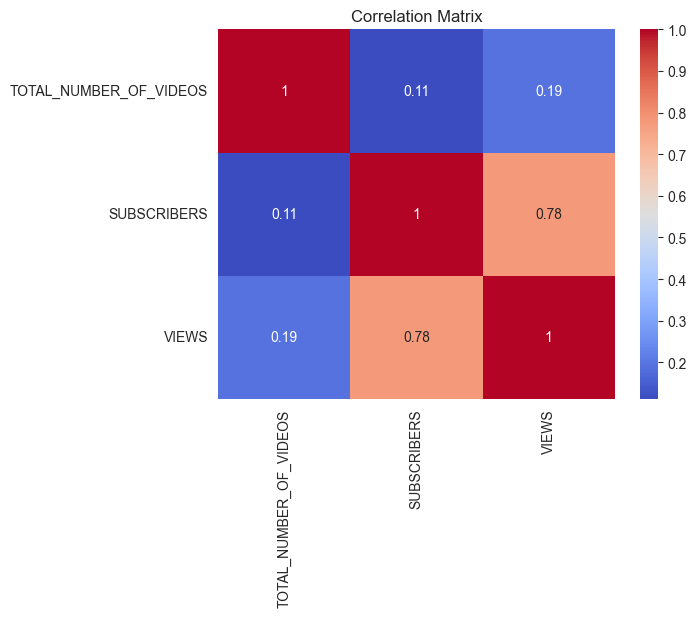

In [12]:
correlation_matrix = data[['TOTAL_NUMBER_OF_VIDEOS', 'SUBSCRIBERS', 'VIEWS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Highlight:
- The correlation between SUBSCRIBERS and VIEWS is very high (0.78), indicating a strong positive relationship. This means channels with more subscribers also tend to have higher views.

- The correlation between TOTAL_NUMBER_OF_VIDEOS and both SUBSCRIBERS (0.11) and VIEWS (0.19) is relatively low, suggesting that the number of videos alone does not strongly drive subscriber count or view count.

#### 2. Category Distribution Analysis: 
To identify which categories have the highest number of subscribers and views, and understand the performance of different content types.

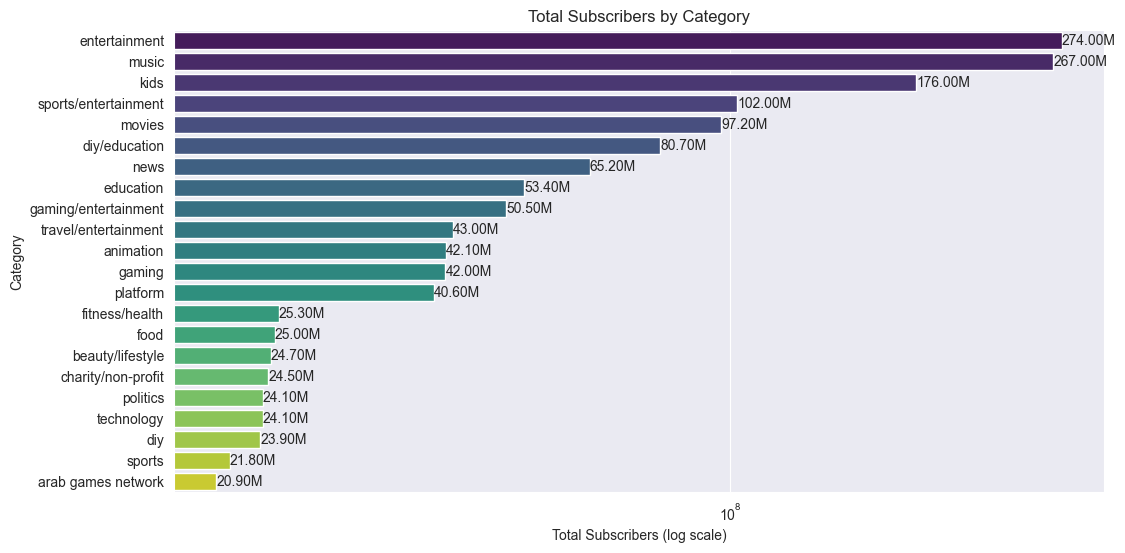

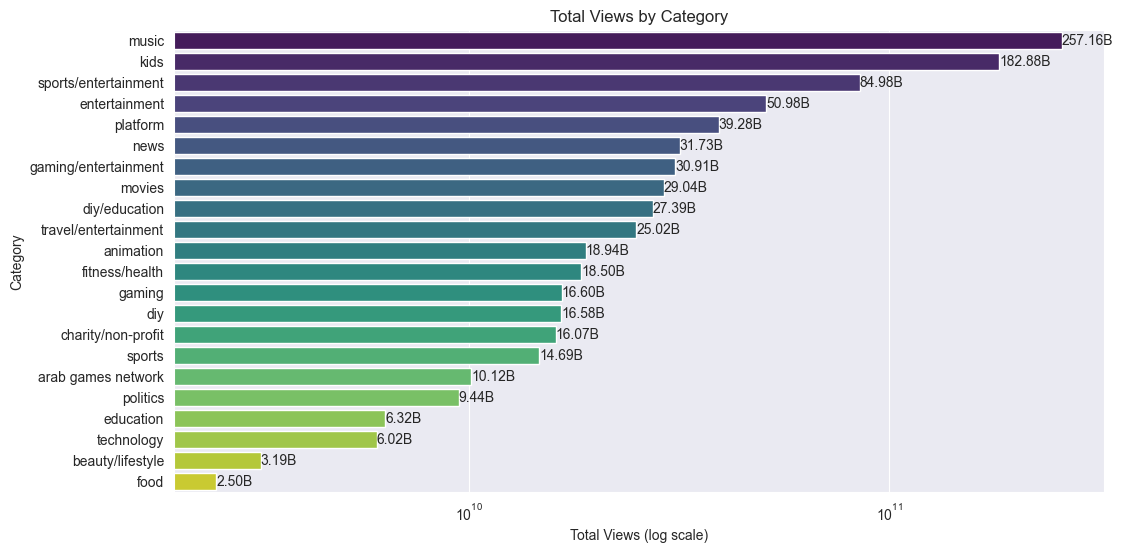

In [13]:
import re

# Function to format numbers with suffixes and round to 2 decimal places
def format_number(num):
    if num >= 1e9:
        return f"{num/1e9:.2f}B"
    elif num >= 1e6:
        return f"{num/1e6:.2f}M"
    elif num >= 1e3:
        return f"{num/1e3:.2f}K"
    else:
        return f"{num:.2f}"


# Ensure that there are no non-positive values for log scaling
category_summary_subscribers = data_cleaned.groupby('CATEGORY').agg({
    'SUBSCRIBERS': 'sum',
    'VIEWS': 'sum'
}).reset_index()
category_summary_subscribers = category_summary_subscribers[category_summary_subscribers['SUBSCRIBERS'] > 0].sort_values(by='SUBSCRIBERS', ascending=False)

category_summary_views = data_cleaned.groupby('CATEGORY').agg({
    'SUBSCRIBERS': 'sum',
    'VIEWS': 'sum'
}).reset_index()
category_summary_views = category_summary_views[category_summary_views['VIEWS'] > 0].sort_values(by='VIEWS', ascending=False)

# Plotting Total Subscribers by Category
plt.figure(figsize=(12, 6))
barplot_subscribers = sns.barplot(x='SUBSCRIBERS', y='CATEGORY', data=category_summary_subscribers, hue='CATEGORY', dodge=False, palette='viridis', legend=False)
plt.xscale('log')
plt.title('Total Subscribers by Category')
plt.xlabel('Total Subscribers (log scale)')
plt.ylabel('Category')

# Add annotations for Total Subscribers
for index, value in enumerate(category_summary_subscribers['SUBSCRIBERS']):
    plt.text(value, index, format_number(value), ha='left', va='center')

plt.show()

# Plotting Total Views by Category
plt.figure(figsize=(12, 6))
barplot_views = sns.barplot(x='VIEWS', y='CATEGORY', data=category_summary_views, hue='CATEGORY', dodge=False, palette='viridis', legend=False)
plt.xscale('log')
plt.title('Total Views by Category')
plt.xlabel('Total Views (log scale)')
plt.ylabel('Category')

# Add annotations for Total Views
for index, value in enumerate(category_summary_views['VIEWS']):
    plt.text(value, index, format_number(value), ha='left', va='center')

plt.show()


 Total Subscribers by Category:

- The Entertainment category leads significantly in total subscribers, followed by Music and Kids.
- Categories like Sports/Entertainment, Movies, and DIY/Education also have substantial subscriber bases.
- The lowest subscriber counts are found in categories like Arab Games Network, Sports, and Technology.

 Total Views by Category:

- The Music category has the highest total views, followed by Kids and Sports/Entertainment.
- The Entertainment category, while leading in subscribers, ranks fourth in total views.
- Categories like Food, Beauty/Lifestyle, and Technology have the lowest view counts.


#### 3. Which categories have the most subscribers and views?
- Analysis: Aggregate the total number of subscribers and views by category and visualize with bar charts.
- Purpose: Determine how engaged the audience is with content in each category.

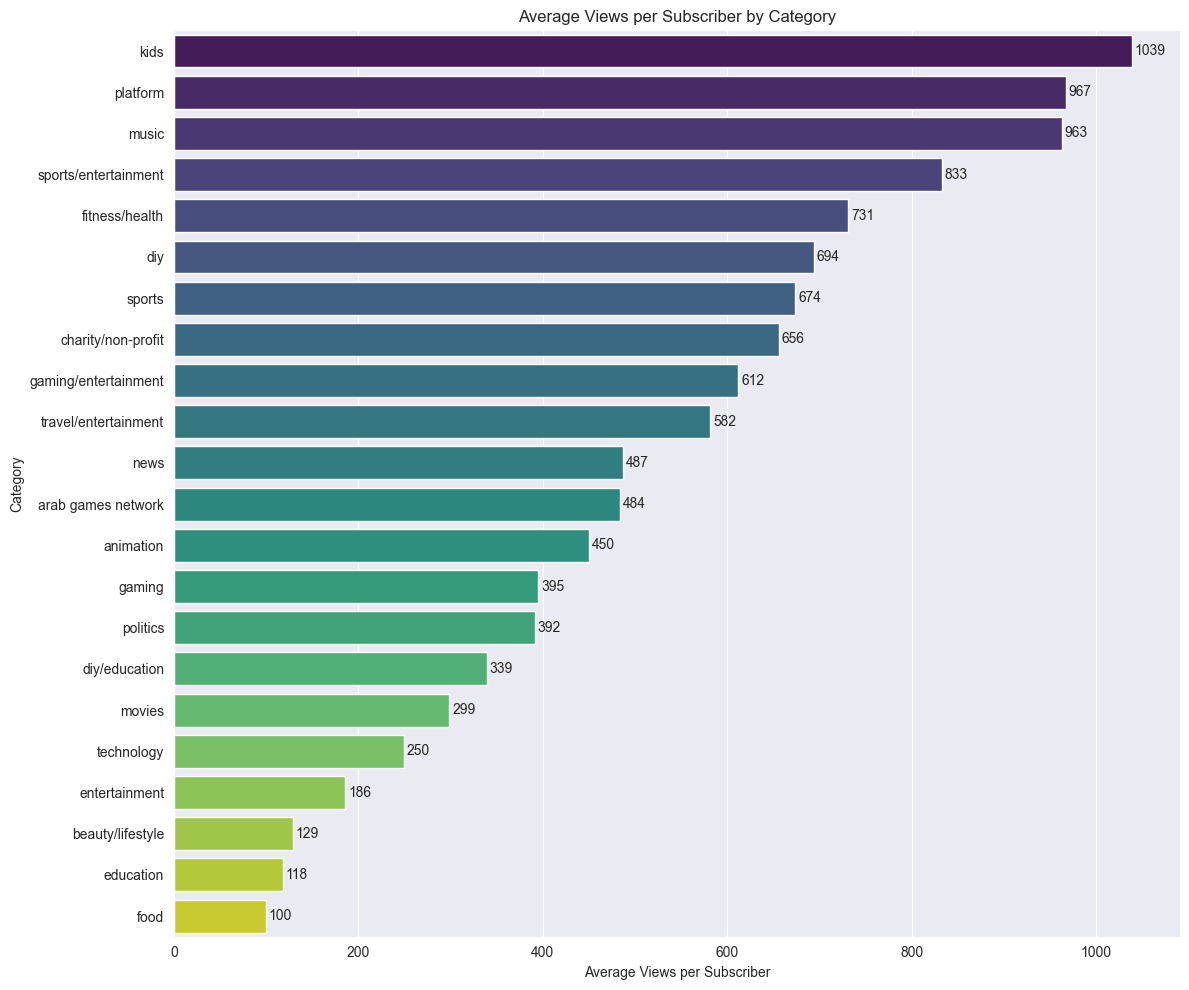

In [16]:
#Engagement Analysis:

category_summary = data_cleaned.groupby('CATEGORY').agg({
    'SUBSCRIBERS': 'sum',
    'VIEWS': 'sum'
}).reset_index()

category_summary['Avg_Views_Per_Subscriber'] = category_summary['VIEWS'] / category_summary['SUBSCRIBERS']

# Sort the chart by Avg_Views_Per_Subscriber
category_summary_sorted = category_summary.sort_values('Avg_Views_Per_Subscriber', ascending=False)

plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Avg_Views_Per_Subscriber', y='CATEGORY',hue = 'CATEGORY', data=category_summary_sorted, palette='viridis')

plt.title('Average Views per Subscriber by Category')
plt.xlabel('Average Views per Subscriber')
plt.ylabel('Category')

# Add the labels
for i, v in enumerate(category_summary_sorted['Avg_Views_Per_Subscriber']):
    ax.text(v + 3, i, f'{v:.0f}', va='center')

plt.tight_layout()
plt.show()

#### 4. Channel Performance Analysis:
- Purpose: Identify top-performing channels within each category.
- Method: Sort channels by subscribers and views within each category to highlight the top 5 channels.

In [ ]:
# Create the plot
plt.figure(figsize=(15, 20))

# Use Seaborn to create a horizontal bar plot
sns.barplot(x='SUBSCRIBERS', y='NAME_OF_CHANNEL', hue='CATEGORY', data=top_channels, dodge=False)

# Customize the plot
plt.title('Top 5 Channels by Subscribers in Each Category', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Channel Name', fontsize=12)

# Add data labels at the end of each bar
for i, v in enumerate(top_channels['SUBSCRIBERS']):
    plt.text(v, i, f' {v:,}', va='center', fontsize=8)

# Adjust the legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


##### Key Observations

High Engagement Categories:

- Entertainment: MrBeast leads with 274M subscribers and 50.98B views. Action: Leverage MrBeast's strategies to boost engagement.
- Music: T-Series dominates with 267M subscribers and 257.16B views. Action: Invest in high-quality music videos.
- Kids: Cocomelon has 176M subscribers and 182.88B views. Action: Focus on educational and entertaining content for kids.

Moderate Engagement:

- Movies: Goldmines with 97.2M subscribers and 29.04B views. Action: Promote movie-related content to increase subscribers.
High Engagement per Video:

- DIY/Education: 5-Minute Crafts with 80.7M subscribers and 27.39B views. Action: Expand DIY/Education content.
Gaming/Entertainment: SonyMusicIndiaVEVO with 50.5M subscribers and 30.91B views. Action: Create more gaming-related content.

Low Engagement Categories:

- Food, Technology, Beauty/Lifestyle, Politics: These categories show lower subscribers and views. Action: Revise content strategy, improve quality, and increase promotion.
##### Call to Action
- High Engagement Categories: Continue investing in these categories and explore similar high-engagement content.
- Moderate Engagement: Analyze and adapt strategies to convert viewers into subscribers.
- High Engagement per Video: Increase content volume while maintaining quality to maximize engagement.
- Low Engagement Categories: Reevaluate and revamp content strategies to attract more viewers and subscribers.

#### 5. Content Efficiency Analysis

- Evaluate the efficiency of content by comparing average views per video and average subscribers per video.


In [ ]:
# Create a bubble chart
plt.figure(figsize=(14, 8))
bubble_chart = sns.scatterplot(x='TOTAL_NUMBER_OF_VIDEOS', y='SUBSCRIBERS', size='VIEWS', hue='CATEGORY', data=data_cleaned, sizes=(20, 2000), alpha=0.6, palette='viridis')

# Add labels for each point
for line in range(0, data_cleaned.shape[0]):
    bubble_chart.text(data_cleaned.TOTAL_NUMBER_OF_VIDEOS.iloc[line],
                      data_cleaned.SUBSCRIBERS.iloc[line],
                      data_cleaned.CATEGORY.iloc[line],
                      horizontalalignment='left',
                      size='small',
                      color='black')

plt.title('Total Number of Videos vs Subscribers by Category (Bubble Size represents Views)')
plt.xlabel('Total Number of Videos')
plt.ylabel('Subscribers')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

##### Highlights:
1. High Engagement Categories:
- Entertainment, Music, Kids: Largest bubbles, highest views, and subscribers. Music has fewer videos but high engagement per video.
- Sports/Entertainment: Significant videos, high subscribers, and views.
2. Moderate Engagement:
- Movies: Many videos and views, fewer subscribers.
3. High Engagement per Video:
- DIY/Education, Gaming/Entertainment: Fewer videos, high subscribers, and views.
4. Low Engagement Categories:
- Food, Technology, Beauty/Lifestyle, Politics: Smaller bubbles, fewer subscribers and views, need strategy revision.

#### 6. Category Comparison
- Purpose: Compare categories to understand which ones have the highest potential for growth.
- Method: Calculate the ratio of subscribers to views for each category to identify highly engaging categories.

In [ ]:
#  Subscriber/View
category_summary['Subscriber_View_Ratio'] = category_summary['SUBSCRIBERS'] / category_summary['VIEWS']

# Sort the DataFrame by Subscriber_View_Ratio
category_summary_sorted = category_summary.sort_values('Subscriber_View_Ratio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Subscriber_View_Ratio', y='CATEGORY', hue='CATEGORY', data=category_summary_sorted, palette='viridis', legend=False)
plt.title('Subscriber to View Ratio by Category')
plt.xlabel('Subscriber to View Ratio')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Highlights:
• Food category has the highest subscriber to view ratio, significantly outperforming other categories.
• Education and beauty/lifestyle round out the top 3 categories.
• There's a clear gap between the top 5 categories and the rest.

Mid-lights:
• Entertainment and technology sit in the middle range, showing moderate engagement.
• Categories like gaming, animation, and news fall in the middle-lower range.
• Sports-related categories (sports, sports/entertainment) have relatively low ratios, suggesting high view counts but potentially lower subscriber loyalty.

Key observations:
1. Niche content (food, education) seems to drive higher subscriber loyalty compared to broad entertainment.
2. Lifestyle-oriented content (beauty/lifestyle) performs well in converting views to subscriptions.
3. News and politics have similar ratios, indicating consistent engagement patterns for informational content.
4. Kids content has the lowest ratio, possibly due to repeated views from a smaller subscriber base.
5. The ratios span from about 0.001 to 0.01, showing significant variation across categories.

This data suggests that focusing on niche, educational, or lifestyle content might be more effective for building a loyal subscriber base, while entertainment and general interest categories may generate more views but have lower subscription rates.